In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('data/clean/cleaned_parkrun.csv')
event_df = pd.read_csv('data/clean/event_data.csv')
runner_df = pd.read_csv('data/clean/runner_stats.csv')

In [3]:
df.columns

Index(['Date', 'Position', 'Position_score', 'Name', 'Runner_id',
       'Parkrun_count', 'Gender', 'Age_group', 'Time_in_minutes',
       'temperature', 'windspeed', 'precipitation', 'Total_Appearances',
       'Appearance_Instance', 'Days_since_last_parkrun', 'Total_event_runners',
       'PB_mins', 'ave_mins', 'prev_PB', 'avg_prev_run_time'],
      dtype='object')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.columns

Index(['Date', 'Position', 'Position_score', 'Name', 'Runner_id',
       'Parkrun_count', 'Gender', 'Age_group', 'Time_in_minutes',
       'temperature', 'windspeed', 'precipitation', 'Total_Appearances',
       'Appearance_Instance', 'Days_since_last_parkrun', 'Total_event_runners',
       'PB_mins', 'ave_mins', 'prev_PB', 'avg_prev_run_time'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157970 entries, 0 to 157969
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date                     157970 non-null  datetime64[ns]
 1   Position                 157970 non-null  int64         
 2   Position_score           157970 non-null  float64       
 3   Name                     157970 non-null  object        
 4   Runner_id                157970 non-null  int64         
 5   Parkrun_count            157970 non-null  int64         
 6   Gender                   157970 non-null  object        
 7   Age_group                157970 non-null  object        
 8   Time_in_minutes          157970 non-null  float64       
 9   temperature              157970 non-null  float64       
 10  windspeed                157970 non-null  float64       
 11  precipitation            157970 non-null  float64       
 12  Total_Appearance

In [7]:
df.describe()

,Date,Position,Position_score,Runner_id,Parkrun_count,Time_in_minutes,temperature,windspeed,precipitation,Total_Appearances,Appearance_Instance,Days_since_last_parkrun,Total_event_runners,PB_mins,ave_mins,prev_PB,avg_prev_run_time
count,157970,157970.000000,157970.000000,1.579700e+05,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000
mean,2017-01-16 17:37:40.272203264,192.520725,0.501975,1.183994e+06,163.115452,27.104793,11.534113,21.619822,0.089890,136.982560,69.027872,54.025157,382.749471,24.121384,27.141846,24.788140,26.950548
min,2007-11-10 00:00:00,1.000000,0.000000,7.650000e+02,2.000000,14.580000,-2.400000,1.800000,0.000000,2.000000,2.000000,1.000000,14.000000,14.580000,14.715000,14.850000,14.850000
25%,2013-07-13 00:00:00,92.000000,0.261176,4.919300e+04,35.000000,23.330000,7.800000,13.200000,0.000000,30.000000,11.000000,7.000000,343.000000,21.000000,23.670482,21.580000,23.508846
50%,2016-10-29 00:00:00,183.000000,0.504448,2.123450e+05,110.000000,26.420000,11.800000,20.600000,0.000000,88.000000,34.000000,14.000000,391.000000,23.630000,26.655000,24.200000,26.450000
75%,2020-01-11 00:00:00,282.000000,0.741026,1.201449e+06,254.000000,29.870000,15.700000,28.800000,0.000000,210.000000,94.000000,28.000000,434.000000,26.450000,29.754762,27.280000,29.610789
max,2024-12-07 00:00:00,858.000000,1.000000,1.028610e+07,722.000000,82.230000,25.900000,60.500000,3.500000,701.000000,701.000000,5005.000000,859.000000,66.030000,68.760000,71.980000,71.980000
std,NaN,119.819602,0.281510,1.997095e+06,157.943160,5.447611,5.238020,10.948821,0.311865,138.046045,87.867329,195.631321,93.378019,4.157925,4.764686,4.485454,4.764172


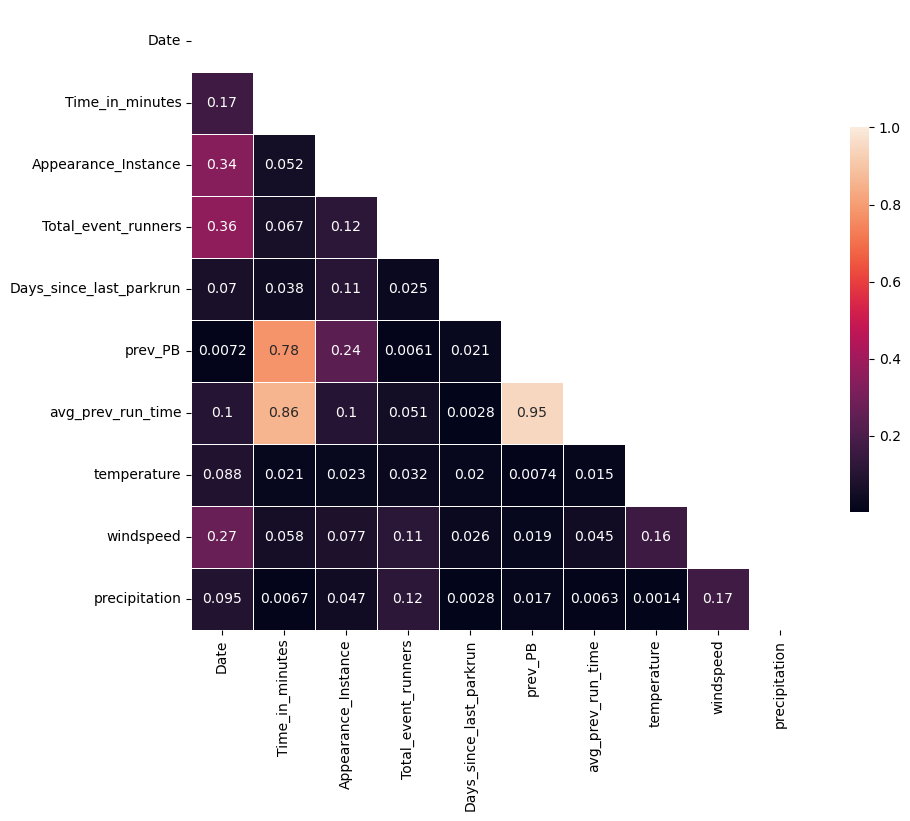

In [8]:
corr=np.abs(df[['Date', 
                'Time_in_minutes',
                'Appearance_Instance',
                'Total_event_runners',
                'Days_since_last_parkrun',
                'prev_PB',
                'avg_prev_run_time',
                'temperature',
                'windspeed',
                'precipitation']].corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [9]:
df['is_PB'] = df['PB_mins'] == df['Time_in_minutes']

In [10]:
df['Appearance/Total'] = (df['Appearance_Instance']-1)/(df['Total_Appearances']-1)

In [11]:
df.groupby('is_PB')['Appearance/Total'].mean()

is_PB
False    0.516225
True     0.692771
Name: Appearance/Total, dtype: float64

In [12]:
def temp_bins(df):
    bins = [-5, 0, 5, 10, 15, 20, 25, 30]  # Adjust based on your data
    df['temp_bins'] = pd.cut(df['temperature'], bins=bins)
    return df

In [13]:
df = temp_bins(df)

df['temp_bins'].unique()

[(10, 15], (5, 10], (0, 5], (15, 20], (-5, 0], (20, 25], (25, 30]]
Categories (7, interval[int64, right]): [(-5, 0] < (0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25] < (25, 30]]

C:\Users\olgeo\AppData\Local\Temp\ipykernel_35820\1665542284.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_temp = df.groupby('temp_bins')['Time_in_minutes'].mean()


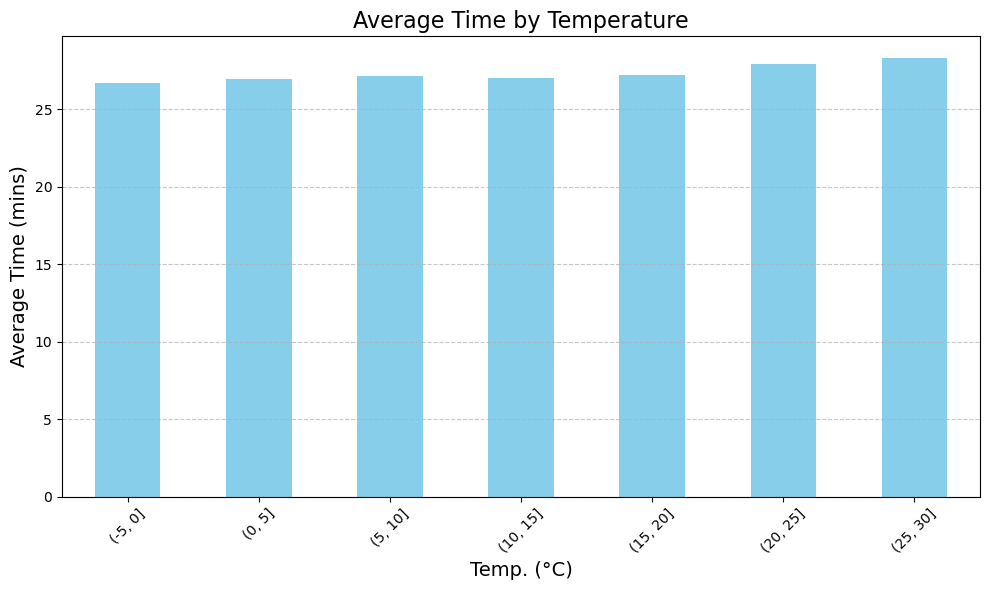

In [14]:
# Calculate the average time per temperature bin
avg_time_by_temp = df.groupby('temp_bins')['Time_in_minutes'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_time_by_temp.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Time by Temperature', fontsize=16)
plt.xlabel('Temp. (°C)', fontsize=14)
plt.ylabel('Average Time (mins)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
df.groupby('temp_bins')['Total_event_runners'].mean()

C:\Users\olgeo\AppData\Local\Temp\ipykernel_35820\1277879676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('temp_bins')['Total_event_runners'].mean()


temp_bins
(-5, 0]     267.702657
(0, 5]      382.525872
(5, 10]     396.019619
(10, 15]    384.901361
(15, 20]    374.377607
(20, 25]    353.816143
(25, 30]    251.000000
Name: Total_event_runners, dtype: float64

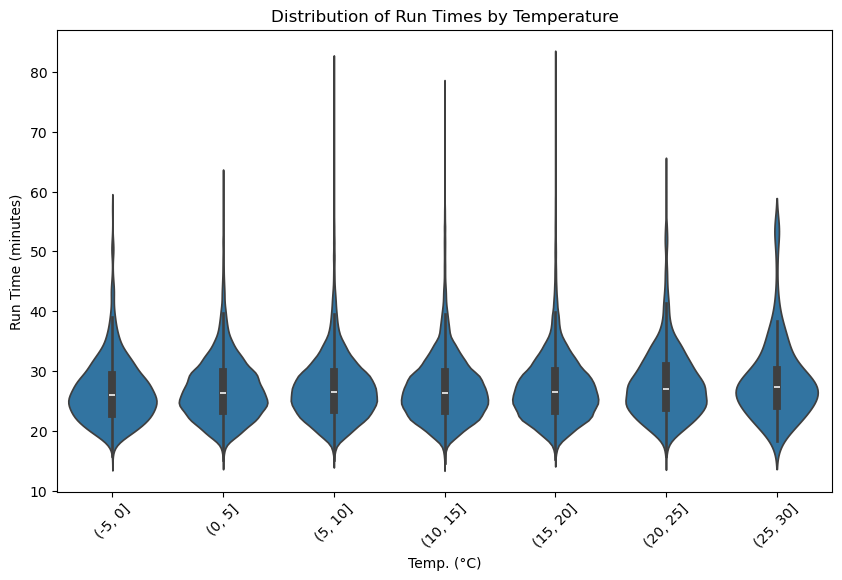

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='temp_bins', y='Time_in_minutes', data=df)  # Use 'Temperature_range' if binned
plt.title('Distribution of Run Times by Temperature')
plt.xlabel('Temp. (°C)')
plt.ylabel('Run Time (minutes)')
plt.xticks(rotation=45)
plt.show()

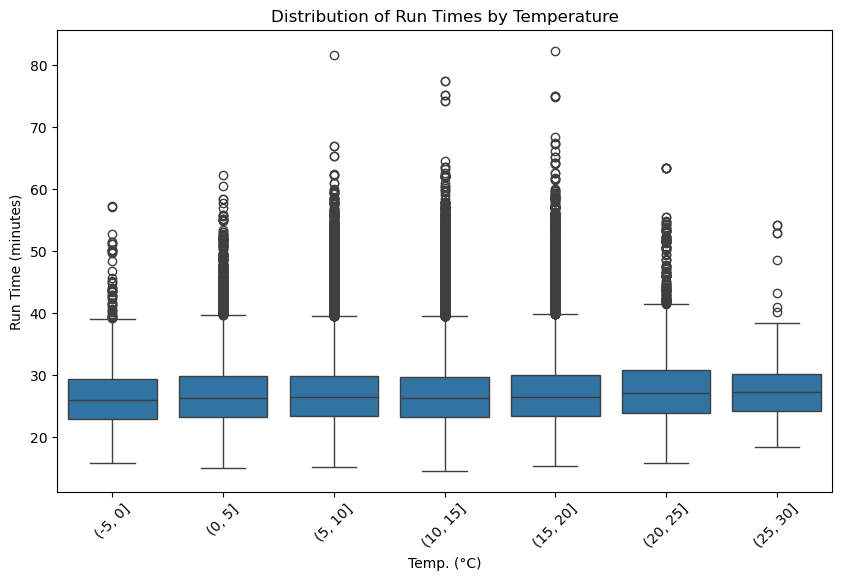

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='temp_bins', y='Time_in_minutes', data=df)  # Use 'Temperature_range' if binned
plt.title('Distribution of Run Times by Temperature')
plt.xlabel('Temp. (°C)')
plt.ylabel('Run Time (minutes)')
plt.xticks(rotation=45)
plt.show()

In [18]:
df.groupby('precipitation')['Runner_id'].count()

precipitation
0.0    126409
0.1      9837
0.2      6623
0.3      3490
0.4      2155
0.5      2626
0.6      1221
0.7       765
0.8       590
0.9       751
1.0       258
1.1       610
1.2       241
1.3       320
1.4       311
1.5       204
1.6       109
1.7       290
2.2       145
2.3       112
2.5       122
2.7       202
2.8       347
3.5       232
Name: Runner_id, dtype: int64

In [19]:
def precip_bins(df):
    bins = [0, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0]
    labels = ['0-0.1', '0.1-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-5.0']
    df['precip_bins'] = pd.cut(df['precipitation'], bins=bins, labels=labels, include_lowest=True)
    return df

C:\Users\olgeo\AppData\Local\Temp\ipykernel_35820\3403915839.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_precip = df.groupby('precip_bins')['Time_in_minutes'].mean()


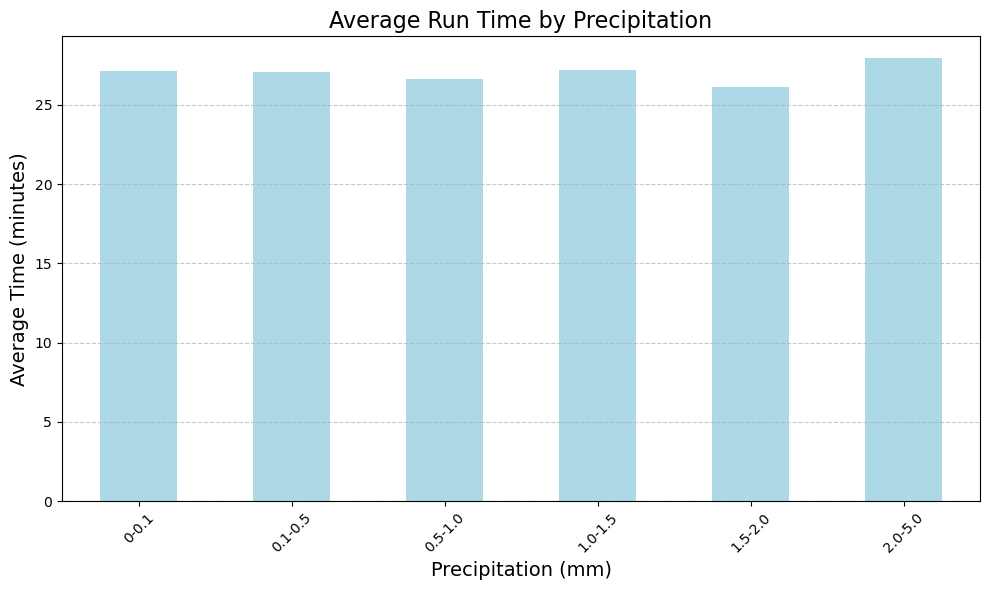

In [20]:
df = precip_bins(df)

# Define precipitation bins
bins = [0, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0]
labels = ['0-0.1', '0.1-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-5.0']
df['precip_bins'] = pd.cut(df['precipitation'], bins=bins, labels=labels, include_lowest=True)

# Group by bins and calculate average times
avg_time_by_precip = df.groupby('precip_bins')['Time_in_minutes'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
avg_time_by_precip.plot(kind='bar', color='lightblue')

# Customize the plot
plt.title('Average Run Time by Precipitation', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Average Time (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
event_df = temp_bins(event_df)
event_df = precip_bins(event_df)

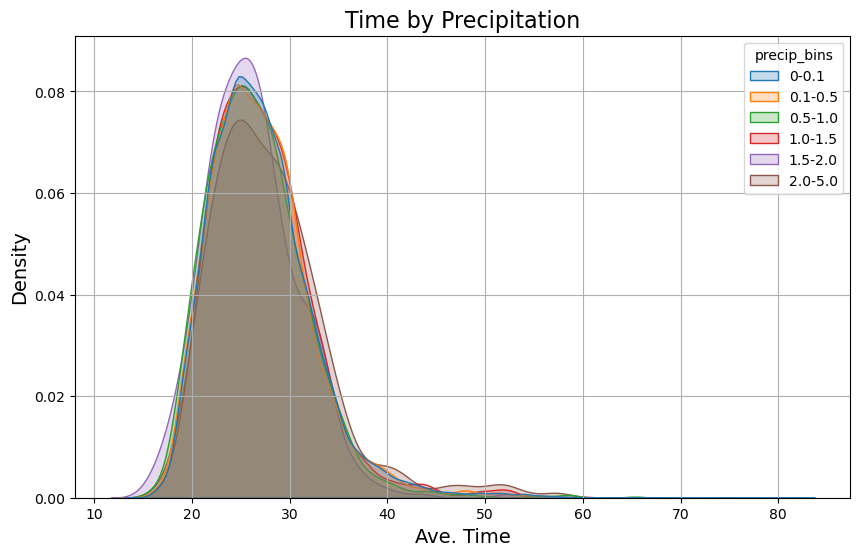

In [22]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Time_in_minutes', hue = 'precip_bins', fill=True, common_norm=False)

# Customize the plot
plt.title('Time by Precipitation', fontsize=16)
plt.xlabel('Ave. Time', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

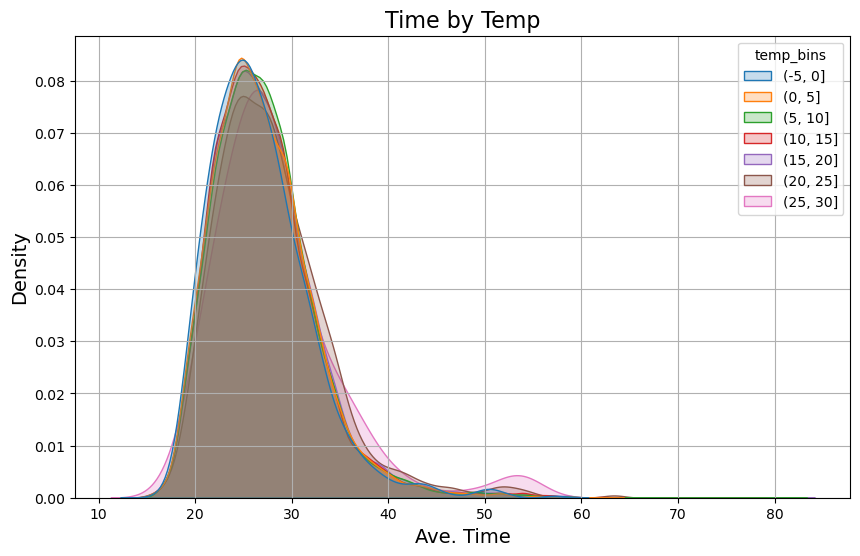

In [23]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Time_in_minutes', hue = 'temp_bins', fill=True, common_norm=False)

# Customize the plot
plt.title('Time by Temp', fontsize=16)
plt.xlabel('Ave. Time', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

In [24]:
df.groupby('precip_bins')['Time_in_minutes'].mean()

C:\Users\olgeo\AppData\Local\Temp\ipykernel_35820\754034662.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('precip_bins')['Time_in_minutes'].mean()


precip_bins
0-0.1      27.118916
0.1-0.5    27.037783
0.5-1.0    26.643066
1.0-1.5    27.209176
1.5-2.0    26.124211
2.0-5.0    27.918931
Name: Time_in_minutes, dtype: float64

In [25]:
df.groupby('precip_bins')['Total_event_runners'].mean()

C:\Users\olgeo\AppData\Local\Temp\ipykernel_35820\410712554.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('precip_bins')['Total_event_runners'].mean()


precip_bins
0-0.1      386.487794
0.1-0.5    372.576339
0.5-1.0    354.256346
1.0-1.5    316.689205
1.5-2.0    243.010025
2.0-5.0    306.429310
Name: Total_event_runners, dtype: float64

In [26]:
df.groupby('temp_bins')['Time_in_minutes'].mean()

C:\Users\olgeo\AppData\Local\Temp\ipykernel_35820\3136606545.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('temp_bins')['Time_in_minutes'].mean()


temp_bins
(-5, 0]     26.704245
(0, 5]      26.971325
(5, 10]     27.114468
(10, 15]    27.033851
(15, 20]    27.167544
(20, 25]    27.890384
(25, 30]    28.277338
Name: Time_in_minutes, dtype: float64

In [27]:
df.groupby('temp_bins')['Total_event_runners'].mean()

C:\Users\olgeo\AppData\Local\Temp\ipykernel_35820\1277879676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('temp_bins')['Total_event_runners'].mean()


temp_bins
(-5, 0]     267.702657
(0, 5]      382.525872
(5, 10]     396.019619
(10, 15]    384.901361
(15, 20]    374.377607
(20, 25]    353.816143
(25, 30]    251.000000
Name: Total_event_runners, dtype: float64

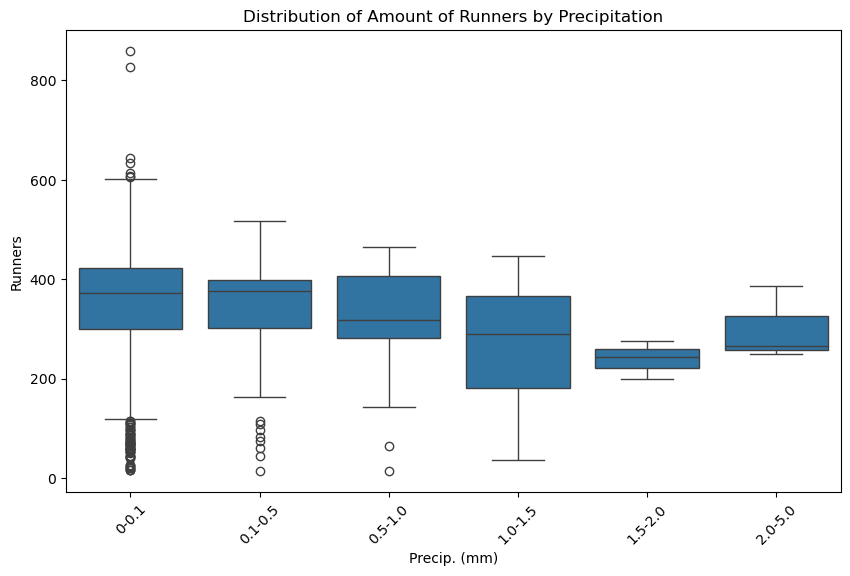

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='precip_bins', y='Total_event_runners', data=event_df)  # Use 'Temperature_range' if binned
plt.title('Distribution of Amount of Runners by Precipitation')
plt.xlabel('Precip. (mm)')
plt.ylabel('Runners')
plt.xticks(rotation=45)
plt.show()

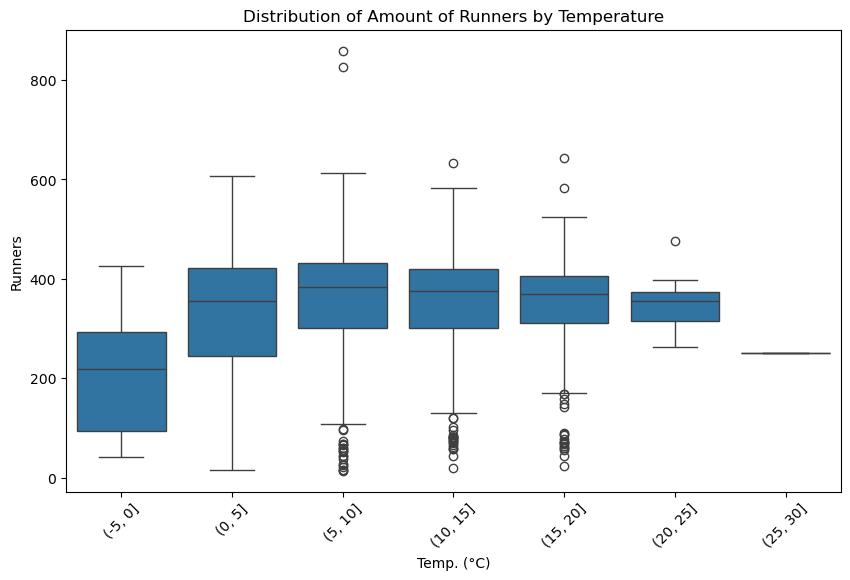

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='temp_bins', y='Total_event_runners', data=event_df)  # Use 'Temperature_range' if binned
plt.title('Distribution of Amount of Runners by Temperature')
plt.xlabel('Temp. (°C)')
plt.ylabel('Runners')
plt.xticks(rotation=45)
plt.show()

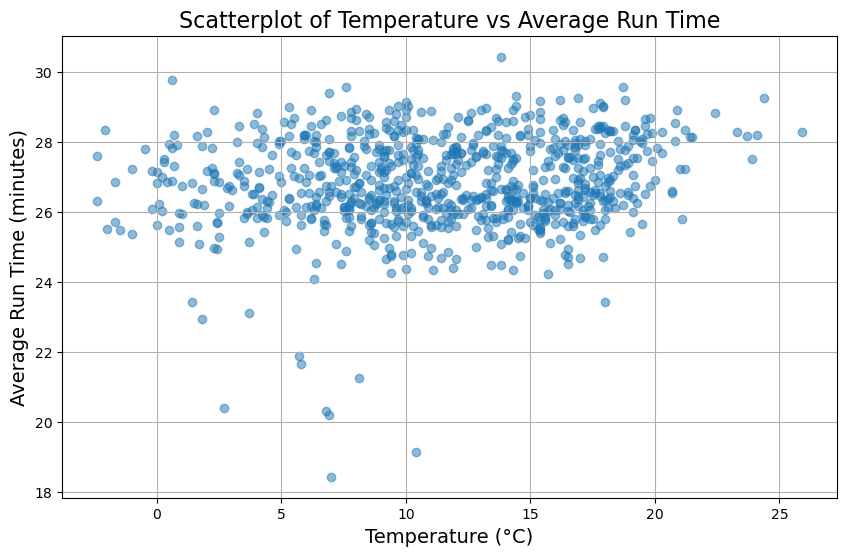

In [30]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(event_df['temperature'], event_df['ave_run_time'], alpha=0.5)

# Customize the plot
plt.title('Scatterplot of Temperature vs Average Run Time', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Average Run Time (minutes)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

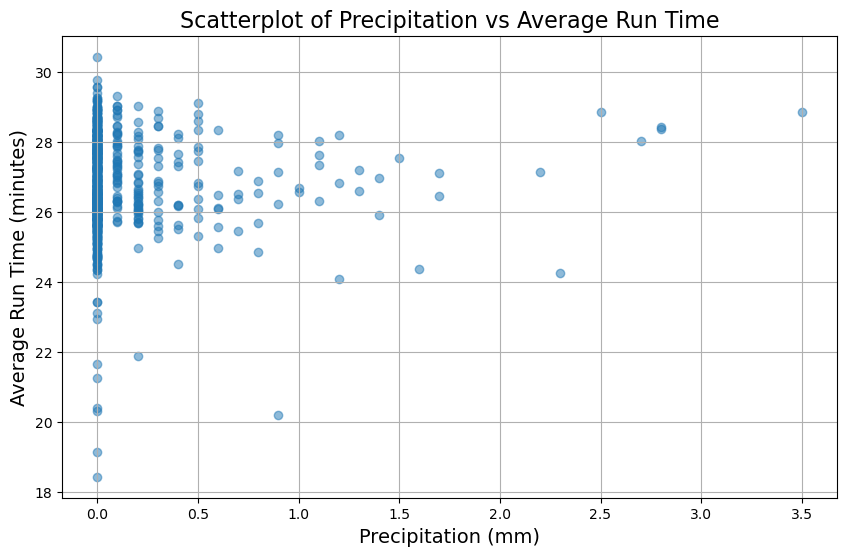

In [31]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(event_df['precipitation'], event_df['ave_run_time'], alpha=0.5)

# Customize the plot
plt.title('Scatterplot of Precipitation vs Average Run Time', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Average Run Time (minutes)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

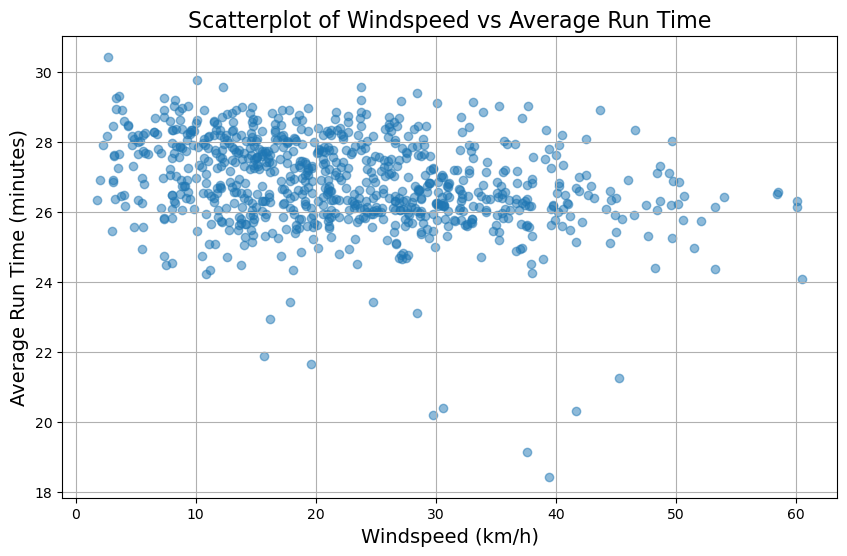

In [32]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(event_df['windspeed'], event_df['ave_run_time'], alpha=0.5)

# Customize the plot
plt.title('Scatterplot of Windspeed vs Average Run Time', fontsize=16)
plt.xlabel('Windspeed (km/h)', fontsize=14)
plt.ylabel('Average Run Time (minutes)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

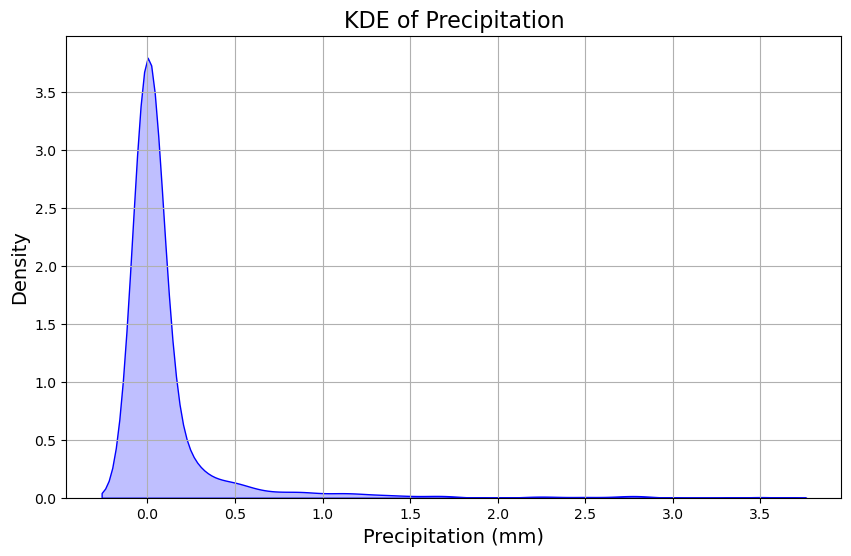

In [33]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=event_df, x='precipitation', fill=True, color='blue')

# Customize the plot
plt.title('KDE of Precipitation', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

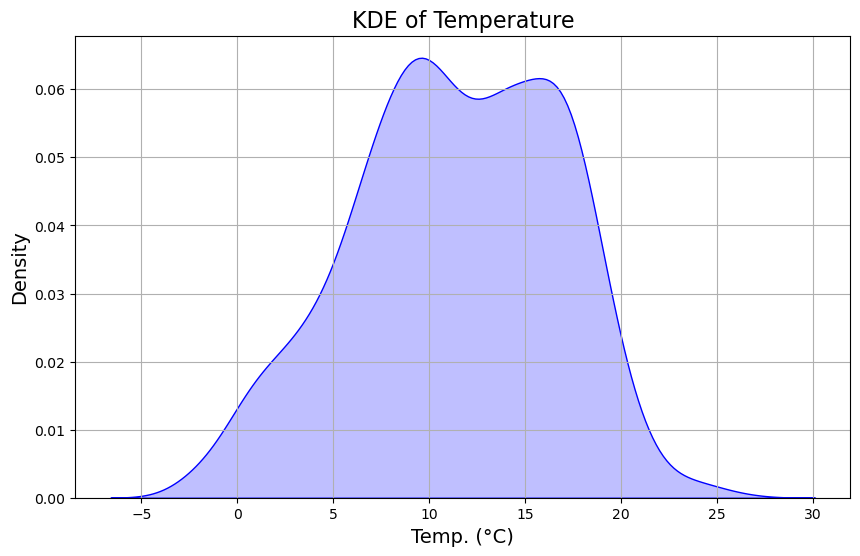

In [34]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=event_df, x='temperature', fill=True, color='blue')

# Customize the plot
plt.title('KDE of Temperature', fontsize=16)
plt.xlabel('Temp. (°C)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

In [35]:
df.columns

Index(['Date', 'Position', 'Position_score', 'Name', 'Runner_id',
       'Parkrun_count', 'Gender', 'Age_group', 'Time_in_minutes',
       'temperature', 'windspeed', 'precipitation', 'Total_Appearances',
       'Appearance_Instance', 'Days_since_last_parkrun', 'Total_event_runners',
       'PB_mins', 'ave_mins', 'prev_PB', 'avg_prev_run_time', 'is_PB',
       'Appearance/Total', 'temp_bins', 'precip_bins'],
      dtype='object')

In [36]:
runner_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7519 entries, 0 to 7518
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Runner_id                7519 non-null   int64  
 1   Name                     7519 non-null   object 
 2   Gender                   7519 non-null   object 
 3   Age_group                7519 non-null   object 
 4   Parkrun_count            7519 non-null   int64  
 5   Total_event_appearances  7519 non-null   int64  
 6   first_event_date         7519 non-null   object 
 7   most_recent_event_date   7519 non-null   object 
 8   PB_date                  6588 non-null   object 
 9   mean_time                7519 non-null   float64
 10  median_time              7519 non-null   float64
 11  best_time                7519 non-null   float64
 12  worst_time               7519 non-null   float64
 13  first_time               7519 non-null   float64
 14  most_recent_time        

In [37]:
runner_df.nunique()

Runner_id                  7519
Name                       7405
Gender                        2
Age_group                    12
Parkrun_count               338
Total_event_appearances     296
first_event_date            817
most_recent_event_date      794
PB_date                     805
mean_time                  6122
median_time                2867
best_time                  1398
worst_time                 1753
first_time                 1473
most_recent_time           1541
dtype: int64

In [38]:
# Drop duplicates in pb_df, keeping the first occurrence of each runner's PB date
runner_df = runner_df.drop_duplicates(subset='Runner_id', keep='first')

In [39]:
runner_df.nunique()

Runner_id                  7519
Name                       7405
Gender                        2
Age_group                    12
Parkrun_count               338
Total_event_appearances     296
first_event_date            817
most_recent_event_date      794
PB_date                     805
mean_time                  6122
median_time                2867
best_time                  1398
worst_time                 1753
first_time                 1473
most_recent_time           1541
dtype: int64

In [40]:
runner_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7519 entries, 0 to 7518
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Runner_id                7519 non-null   int64  
 1   Name                     7519 non-null   object 
 2   Gender                   7519 non-null   object 
 3   Age_group                7519 non-null   object 
 4   Parkrun_count            7519 non-null   int64  
 5   Total_event_appearances  7519 non-null   int64  
 6   first_event_date         7519 non-null   object 
 7   most_recent_event_date   7519 non-null   object 
 8   PB_date                  6588 non-null   object 
 9   mean_time                7519 non-null   float64
 10  median_time              7519 non-null   float64
 11  best_time                7519 non-null   float64
 12  worst_time               7519 non-null   float64
 13  first_time               7519 non-null   float64
 14  most_recent_time        